## Common Test I. Simulating Superfluid Dark Matter (DM) with PyAutoLens 

### Task: 
Modify and/or use the already existing functionality of PyAutoLens to simulate strong lensing from superfluid dark matter. Specifically, you will need to simulate the effects of lensing from a linear mass density - imagine this being a string of mass on galactic scales.

### Demonstration of analytic functions representing a galaxy's light and mass distributions via autolens

In [53]:
%matplotlib inline

import autolens as al
import autofit as af
import autolens.plot as aplt
from astropy import cosmology as cosmo

Below, I created and plot a uniform Cartesian grid, EllipticalSersic & LightProfile object:

In [36]:
grid = al.Grid2D.uniform(
    shape_native=(150, 150),
    pixel_scales=0.05,  # The pixel-scale describes the conversion from pixel units to arc-seconds.
)

grid_plotter = aplt.Grid2DPlotter(grid=grid)


In [37]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.2, 0.1),
    intensity=0.005,
    effective_radius=2.0,
    sersic_index=4.0,
)

By passing this profile the Grid2D, we can evaluate the light emitted at every (y,x) coordinate on the Grid2D and create an image of the LightProfile.

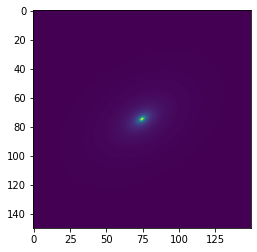

In [38]:
image = sersic_light_profile.image_from_grid(grid=grid)

plt.imshow(image.native)

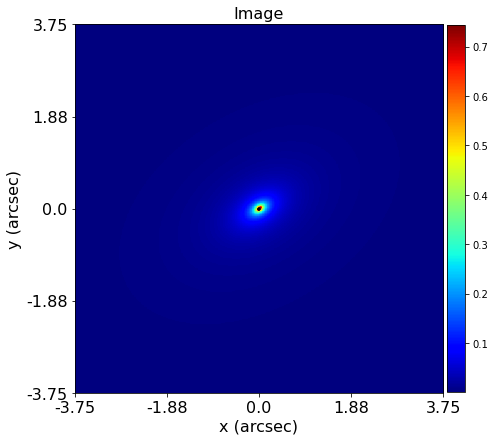

In [39]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid
)
light_profile_plotter.figures(image=True)

In [40]:
isothermal_mass_profile = al.mp.EllipticalIsothermal(
    centre=(0.0, 0.0), elliptical_comps=(0.1, 0.0), einstein_radius=1.6
)

deflections = isothermal_mass_profile.deflections_from_grid(grid=grid)

### Analyzing of the deflection angles

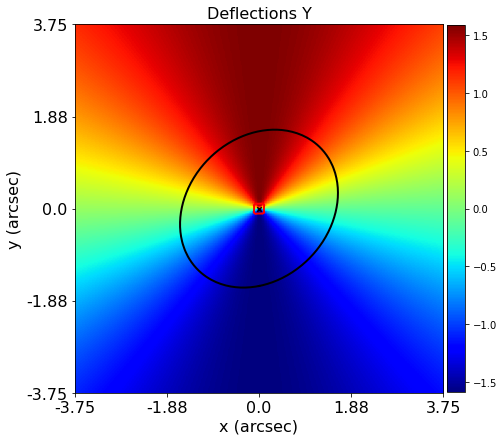

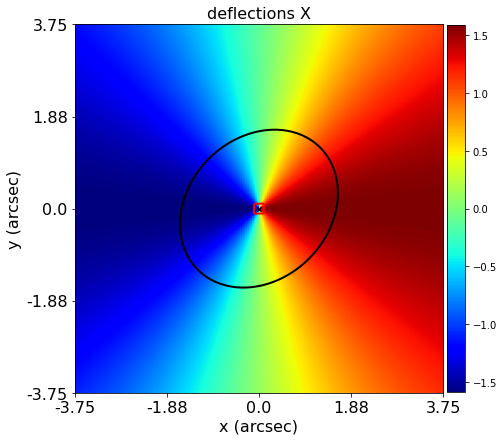

In [41]:
mass_profile_plotter = aplt.MassProfilePlotter(
    mass_profile=isothermal_mass_profile, grid=grid
)
mass_profile_plotter.figures(
    deflections_y=True, deflections_x=True
)

### Using Tracer to create a lens system on passing Galaxy objects:

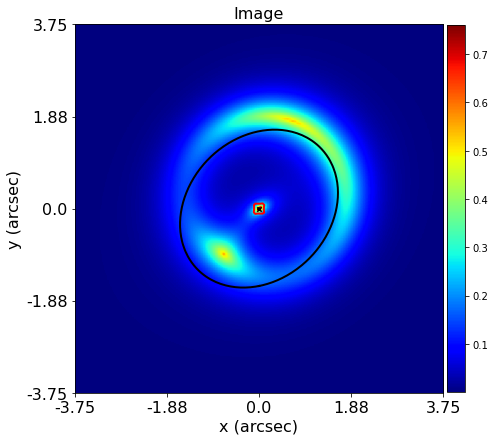

In [43]:
tracer = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy, source_galaxy], cosmology=cosmo.Planck15
)

image = tracer.image_from_grid(grid=grid)

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

### Lens Modeling

Here I have used the Hubble Space Telescope imaging of strong lens SLACS1430+4105 dataset to create a lens model by fitting the dataset into it.

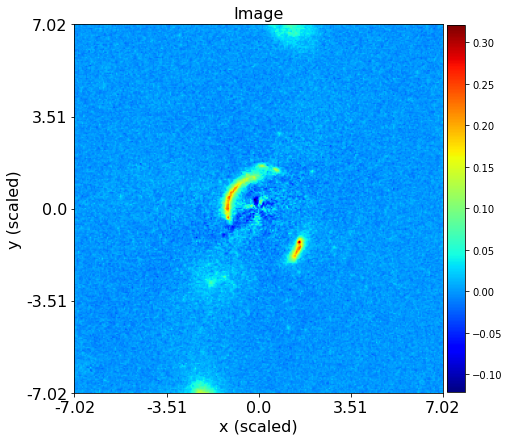

In [77]:
dataset_path = path.join("dataset", "slacs")

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    pixel_scales=0.05,
)

imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)


Now, I have plotted the mass profile of the lensing model.

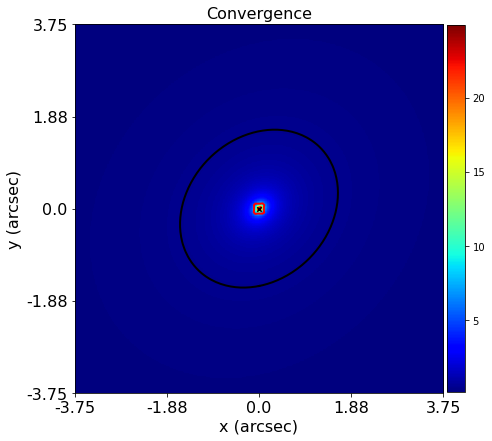

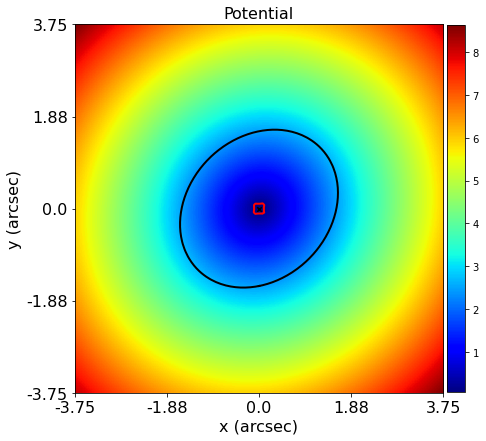

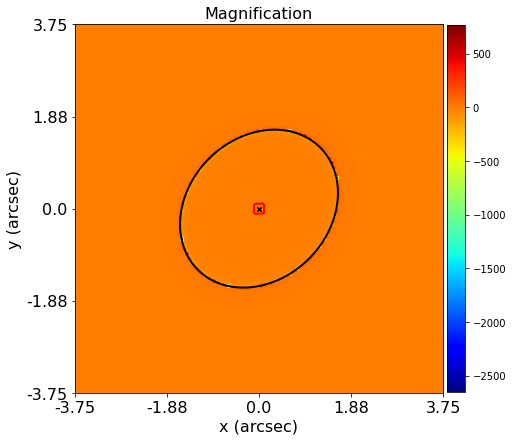

In [78]:
mass_profile_plotter.figures(
    convergence=True,
    potential=True,
    magnification=True,
)

### Simulation of lensing

In [91]:
psf = al.Kernel2D.from_gaussian(shape_native=(11, 11), sigma=0.9, pixel_scales=0.5)

simulator = al.SimulatorImaging(
    exposure_time=300.0, background_sky_level=1.0, psf=psf, add_poisson_noise=True
)

In [92]:
imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)


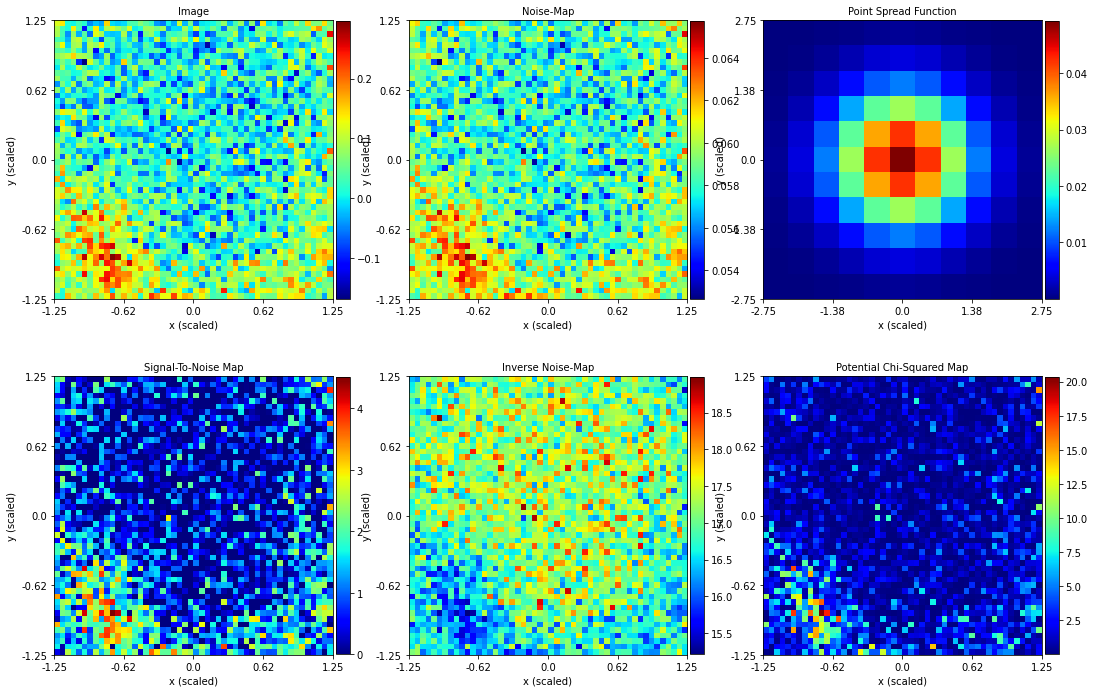

In [93]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()

By plotting a subplot of the Imaging dataset, we can see this object includes the observed image of the strong lens (which has had noise and other instrumental effects added to it) as well as a noise-map and PSF

For more info about me, please visit my LinkedIn profile at https://www.linkedin.com/in/gaurav-g-s-9a7495180/ or feel free to drop a mail at ngs.gaurav.anaxagoras7@gmail.com